In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [22]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target


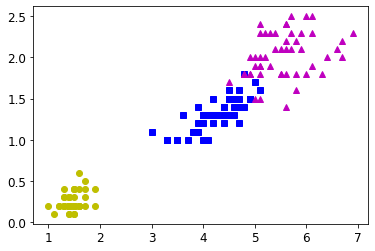

In [26]:
f1, f2 = 0,1

plt.plot(X[:, f1][y==1], X[:, f2][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, f1][y==0], X[:, f2][y==0], "yo", label="Iris setosa")
plt.plot(X[:, f1][y==2], X[:, f2][y==2], "m^", label="Iris virginica")

In [51]:
tree_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)

In [52]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, X, y, cv=3, scoring="accuracy")

array([0.96, 0.92, 0.92])

In [53]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_predict = cross_val_predict(tree_clf, X, y, cv=3)
confusion_matrix(y, y_predict)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  5, 45]], dtype=int64)

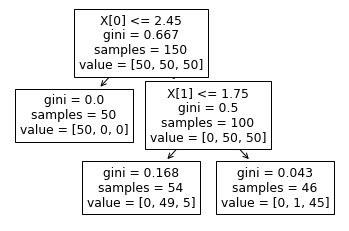

In [54]:
from sklearn import tree 
tree.plot_tree(tree_clf)
plt.show()

# gini = measure of purity -- 0 is pure , bigger is worse
# samples -- number of samples that made it to that step
# value -- how many of each category are in that point of the tree

Saving figure decision_tree_decision_boundaries_plot


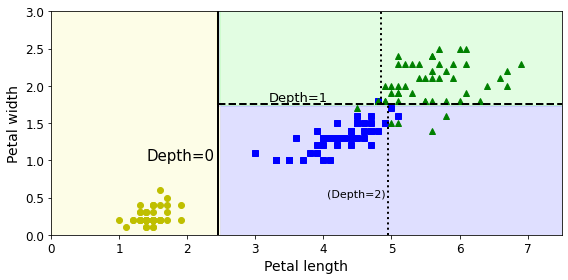

In [55]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()